# ACE CLASS ASSIGNMENT
by `Davis Kiberu`

## Outline:
  1. Import required packages
  2. Reading in Datasets
  3. Data exploration
  4. Descriptive statistics for the data
  5. Class distribution of the data 
  6. Checking for correlation between the different attributes
  7. Cheking for skewdness of the data
  8. Understanding Data with visualization
  9. Preparing Data for Machine Learning
  10. Feature selection
  11. Predictions by algorithm
  12. Improving performance with Ensembles
  13. Comparing Machine Learning Algorithms used

## 1. Import required packages
For this assignment, the required packages and modules are;
* numpy;for computing scientific/mathematical data.
* pandas; for data wrangling and manipulation
* seaborn; for statistical data visualization
* matplotlib.pyplot;  for plots

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


## 2. Reading in Datasets
Comma Seperated Variables(CSV) data files are read into DataFrame objects using Pandas' read_csv() method.
Two datasets are read in: 
* The train set assigned to train
* The test set assigned to test

In [2]:
# Reading in Datasets
train = pd.read_csv("../input/ace-class-assignment/AMP_TrainSet.csv")
test = pd.read_csv("../input/ace-class-assignment/Test.csv")

## 3. Data exploration
To get a feel of the data, we visualize a few of the rows(instances) and columns(attributes) of the data using the `head()` function which shows the first five rows.

a) We the check for the dimensions of the data using the `shape` property of the data which returns a tuple indicating number of rows and columns.

b) We can then explore the names of the various attributes using the columns property and then check for the data type of each attribute using the `dtypes` property.

c) We can also check for missing values (NAs and NaNs) using the `isnull()` function

In [3]:
# Viewing the first five rows of the data
train.head()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


In [4]:
test.head()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453


### a) Data dimensions

In [5]:
# Checking for number of rows and columns in the datasets
train.shape, test.shape

((3038, 12), (758, 11))

### b) Data type for each attribute

In [6]:
# First lets take a look at the column names.
train.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [7]:
test.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112',
       'CT_RACS820104'],
      dtype='object')

In [8]:
# Next, determine the data type for each column
train.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [9]:
test.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
dtype: object

### c) Missing values
Missing values include the standard `NaN` and `Na` 

In [10]:
# Check for missing values.
train.isnull().sum()

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64

In [11]:
test.isnull().sum().sum()

0

In [12]:
# Another way to check for null values and datatypes is using the .info() function. 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 11 columns):
FULL_Charge           758 non-null float64
FULL_AcidicMolPerc    758 non-null float64
FULL_AURR980107       758 non-null float64
FULL_DAYM780201       758 non-null float64
FULL_GEOR030101       758 non-null float64
FULL_OOBM850104       758 non-null float64
NT_EFC195             758 non-null int64
AS_MeanAmphiMoment    758 non-null float64
AS_DAYM780201         758 non-null float64
AS_FUKS010112         758 non-null float64
CT_RACS820104         758 non-null float64
dtypes: float64(10), int64(1)
memory usage: 65.3 KB


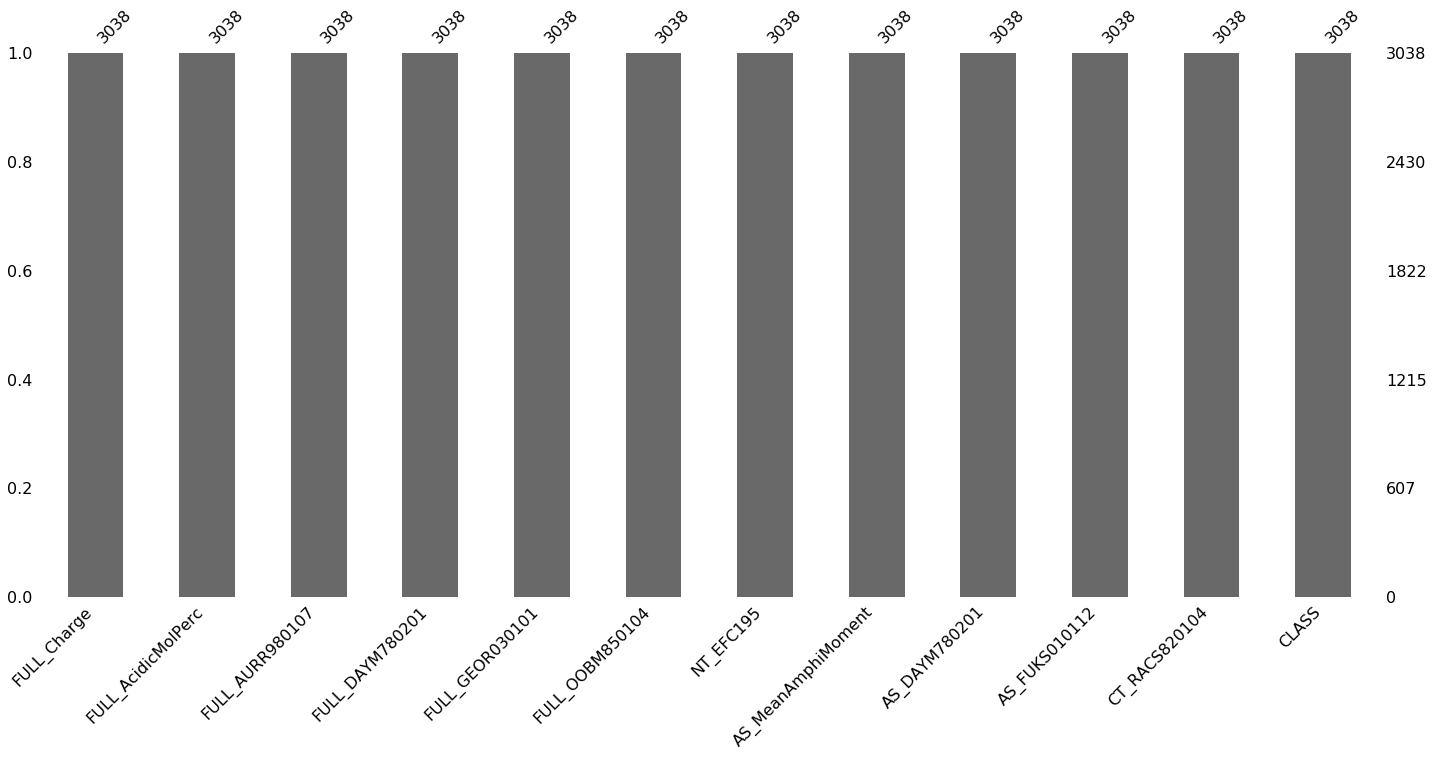

In [73]:
# visualization to check for missing data
import missingno as msno
msno.bar(train)

The above plot indicates that there are no missing values in the `train` dataset

In summary, the train data has 3028 instances and 12 attributes while the test dataset has 758 instances and 11 attributes. 
The data types for each instance are numerical i.e. integers(int64) and floating point numbers(float64).
There are no missing values in the datasets.

## 4. Descriptive statistics for the data
For descriptive statistics, a summary is obtained using the `describe()` function.
The statistics summary show the counts for each attribtute, the mean, standard deviation, the minimum value for numerical atrributes, the 25th, 50th and 75th percentile for each numeric attribute andthe maximum value. 

In [14]:
# Obtain summary statistics
train.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [15]:
test.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,2.073879,8.945091,0.973046,73.821891,0.994212,-2.397922,0.084433,15.570067,73.844204,5.904492,1.250189
std,4.230615,7.814449,0.110676,8.029524,0.032370,1.597138,0.278219,11.362589,8.915193,0.656911,0.218102
min,-13.000000,0.000000,0.699000,47.000000,0.889000,-7.844000,0.000000,0.060000,47.000000,3.843000,0.841000
25%,-0.500000,2.721750,0.894000,68.740250,0.973000,-3.457250,0.000000,5.709000,68.346000,5.471250,1.096000
50%,2.000000,7.500000,0.965000,74.069500,0.994000,-2.238000,0.000000,15.057000,73.646000,5.935500,1.188000
75%,4.000000,14.230250,1.053500,79.284750,1.013000,-1.306250,0.000000,25.290250,80.069250,6.375250,1.378500
max,30.000000,44.118000,1.431000,102.929000,1.182000,2.017000,1.000000,50.098000,102.929000,7.588000,2.283000


## 5. Class distribution of the data
The data being used has a `CLASS` attribute.
We therefore have to determine the number of clases, their labels/values and distribution of observations within these classes.

In [16]:
# Checking for the number of classes in the data
train['CLASS'].nunique()

2

In [17]:
# Checking for the class values
train['CLASS'].unique()

array([1, 0])

There are 1519 instances in class 1 and 1519 instances in class 0.


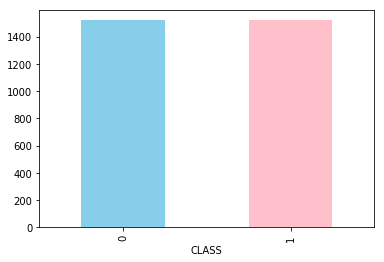

In [18]:
# There are two classes i.e 1 and 0.
# checking for number of instances in each class 
class1 = train.groupby('CLASS').size()[0].sum()
class0 = train.groupby('CLASS').size()[1].sum()
print("There are %s instances in class 1 and %s instances in class 0." % (class1, class0))
# Visualizing the distribution of the data in the different classes
train.groupby('CLASS').size().plot(kind='bar', color=('skyblue', 'pink'))

The Classes 1 and 0 have equal instances and as such our observations are balanced.  
Due to this uniform distribution, chances of algorithm bias are reduced.

## 6. Checking for correlation between the different attributes
Correlation helps us determine how the different attributes relate with each other. It also helps us when deciding which attributes to select especially in the presence of highly correlated attributes in which case one of the two attributes would be sufficient.

The `corr` function is used with Pearson's correlation method since most of the attributes are continous with the exception of `NT_EFC195` and `CLASS`.
 

In [19]:
# Obtaining correlation coefficient values for the different attribute pairs
train.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


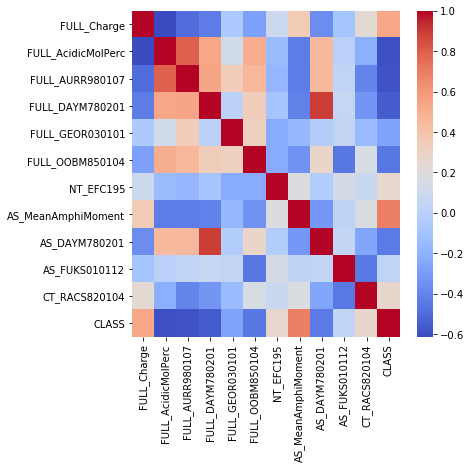

In [20]:
## Visualizing the correlation of attribute pairs using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(train.corr(method='pearson'),cmap='coolwarm')

In [21]:
# correlation of the different attributes with the CLASS attribute
train.corr(method='pearson')['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

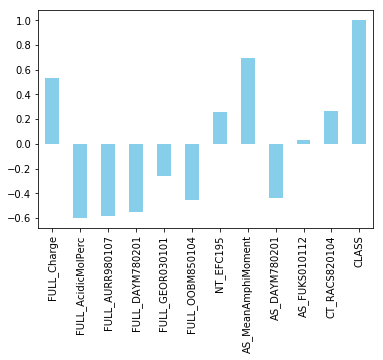

In [22]:
# Visualizing correlation of the different attributes with the CLASS attribute
train.corr(method='pearson')['CLASS'].plot(kind='bar', color=('skyblue'))

From the graph above, it can be observed that most attributes are negatively correlated with the `CLASS` attribute.

## 7. Cheking for skewdness of the data
A skew is a deviation from the normal/Gausian ditribution such that the bell shaped curve is shifted to the right or the left.
* Positively skewed: If the tail is on the right.
* Negatively skewed: If the tail is on the left.

To check for skewdness of the data, the `skew()` function is used.

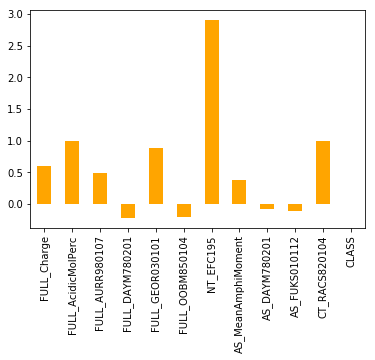

In [23]:
# Checking if the data is normally distributed
train.skew().plot(kind='bar', color='orange')

From the plot it can be observed that most of the attributes are positively skewed with the exception of attributes 4,6,9 and 10.

## 8. Understanding Data with Visualization
In order to better understand the data, different visualizations can be used.
This can be done using;

#### a) Univariate plots
These are plots for singular variables per plot.
* Histograms
* Density plots
* Box plots

#### b) Multivariate plots
These represent more than one variable per plot.
* Correlation Matrix Plot
* Scatter Plot Matrix

### a) Univariate plots

<Figure size 1080x1080 with 0 Axes>

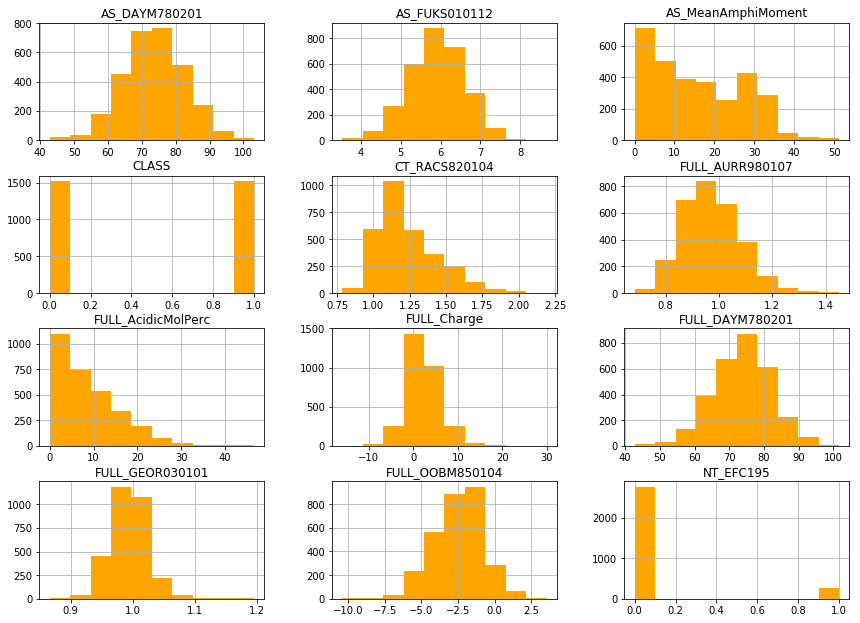

In [24]:
# Histograms
plt.figure(figsize=(15,15))
train.hist(color='orange')

plt.subplots_adjust(bottom=1, right=2, top=3)

plt.show()

From the above plot, the distribution of the attributes can be observed.
Noteworthy is the `CLASS` attribute which is categorical and uniformly distributed and the `NT_EFC195`attribute which also appears categorical but not uniformly distributed.

The NT_EFC195 attribute has 2 values: 0 and 1.
There are 2769 instances with 0's and 269 instances with 1's in the NT_EFC195 attribute.


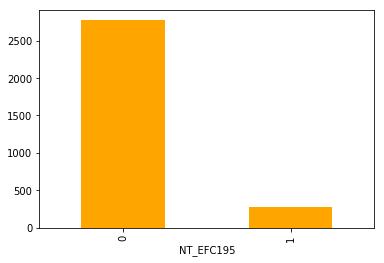

In [25]:
# Zooming in on the NT_EFC195 attribute 
cont = train['NT_EFC195'].unique()
print('The NT_EFC195 attribute has 2 values: %s and %s.' % (cont[0],cont[1]))
gp0 = train.groupby('NT_EFC195').size()[0].sum()
gp1 = train.groupby('NT_EFC195').size()[1].sum()
print("There are %s instances with 0's and %s instances with 1's in the NT_EFC195 attribute." % (gp0, gp1))
# Visualizing the distribution of the instances in the NT_EFC195 attribute 
train.groupby('NT_EFC195').size().plot(kind='bar', color=('orange'))

From the above plot indicates that the variable NT_EFC195 is not uniformly distributed between the classes.

<function matplotlib.pyplot.show(*args, **kw)>

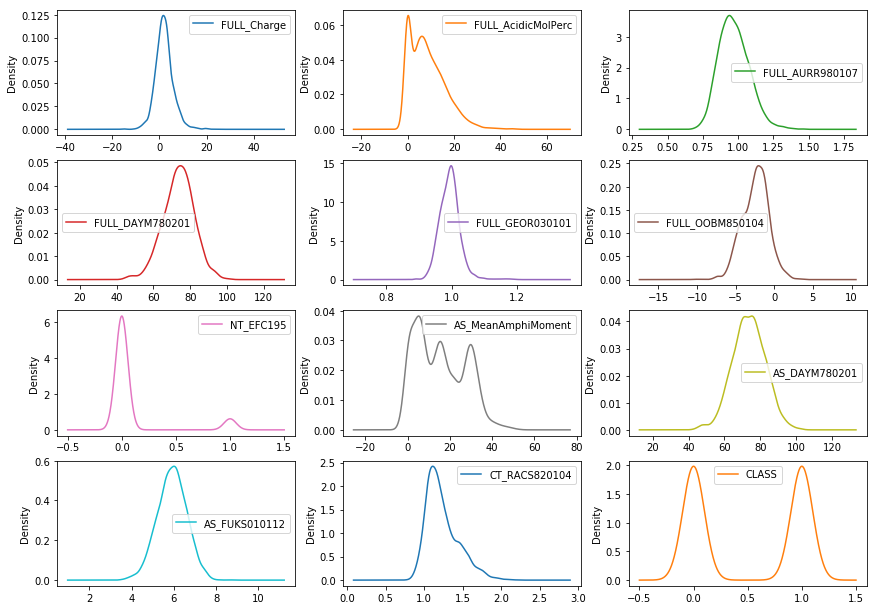

In [26]:
# Density plots
train.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.subplots_adjust(bottom=1, right=2, top=3)
plt.show

The density plots convey the same information as the histograms. 

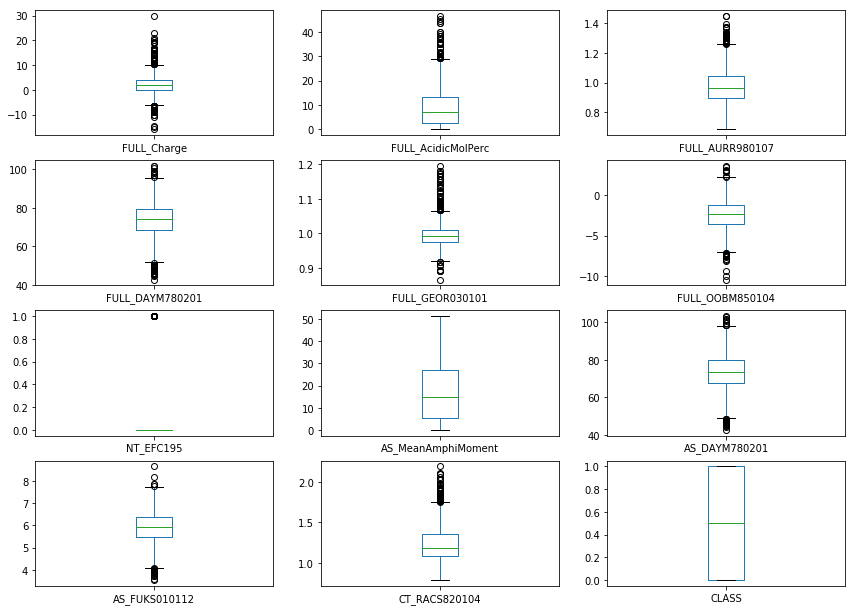

In [27]:
# Box plots
train.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False)
plt.subplots_adjust(bottom=1, right=2, top=3)

plt.show()

#### b) Multivariate plots

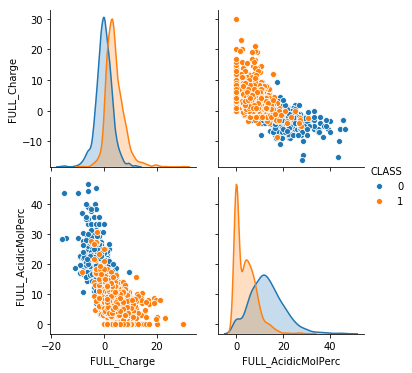

In [28]:
# Visualizing using scatter plot matrix
sns.pairplot(train, hue='CLASS',vars=['FULL_Charge','FULL_AcidicMolPerc'])

# 9. Preparing Data for Machine Learning
## Rescaling data
Since the data has attributes with varying scales,rescalling is done so the attributes have the same scale.
From `numpy`, the `set_printoptions` module is imported to determine the display of number of floating point values other Nump objects and from `scikit learn preprocessing` module, the `MinMaxScaler` option is imported to rescale the data. 


In [29]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = train.values
# seperate array into input, X and output, Y components
X = array[:,0:11]
Y = array[:,11]
scaler = MinMaxScaler(feature_range=(0,1))
# set range of the scale to between 0 and 1.
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]
 [0.457 0.089 0.275 0.399 0.403 0.647 0.    0.011 0.405 0.153 0.424]
 [0.511 0.183 0.323 0.373 0.342 0.595 0.    0.011 0.5   0.196 0.536]]


In the end, no rescaling of data was done since predictions with rescaled data had a poor result.

## 10. Feature selection
Performance of machine learning algorithms is dependent on selected features. Highly informative features improve model performance while irrelevant, partially irrelevant and redundant features negatively impact model performance.

Feature selection reduces overfitting,improves accuracy and reduces training time. 

Feature selection can be done using:
* Univariate Selection
* Recursive Feature Elimination
* Principle Component Analysis
* Feature Importance

For this assignment, `Recursive Feature Elimination (RFE)` is used.
`RFE` works by recursively removing attributes and building a model on those that remain. It uses the model accuracy to indentify the attributes, and their combinations, that contribute the most to predicting the target attribute.

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model,8)
fit = rfe.fit(X,Y)
print("Num Features: ", fit.n_features_)
print("Selected Feature: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  8
Selected Feature:  [ True False  True False  True  True  True  True False  True  True]
Feature Ranking:  [1 3 1 2 1 1 1 1 4 1 1]


In [31]:
# Selecting features from train and test data
train_data = X[:,fit.support_]
test_d = test.values
test_data = test_d[:,fit.support_]

## 11. Prediction by algorithms

Algorithms can be linear or non-linear.  
**Linear algorithms include:**  
* Logistic Regression
* Linear Discriminant Analysis  

**Non Linear algorithms include:**
* K-Nearest Neigbours
* Naive bayes
* Classification and Regression Trees
* Support vector machines


### Linear algorithms

In [32]:
# Logistic regression
## Logistic regression model is a binary dependent variable.
## Applying model with all features.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix

# setting up the model
model = LogisticRegression()

# Cross validating the model on data split using Kfold approach
num_folds = 7
seed=9
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
scoring='accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('Accuracy: ',results.mean()*100)

# Training the model and using it to make a prediction
model.fit(X,Y)
opt = model.predict(test_d)

# Applying Matthews correlation coefficient on the model
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)

# converting model prediction to a dataframe and then a csv
report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_lr.csv")
# Confirming number of classes in model prediction dataframe
print(report['CLASS'].unique())
# Checking for number of instances in each class of the model prediction dataframe
print('False: ',report.groupby('CLASS').size()[0].sum()) 
print('True: ',report.groupby('CLASS').size()[1].sum())

#plot_confusion_matrix(model, train_data, Y, values_format = '.1g', cmap = 'Blues')

Accuracy:  91.50757077024359
MCC:  0.8342865299822478
[False  True]
False:  383
True:  375


The logistic regression algorithm is then applied on RFE selected features.

In [33]:
# Logistic regression
## Logistic regression models a binary dependent variable.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix

# setting up the model
model = LogisticRegression()

# Cross validating the model on data split using Kfold approach
num_folds = 7
seed=9
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
scoring='accuracy'
results = cross_val_score(model, train_data, Y, cv=kfold, scoring=scoring)
print('Accuracy: ',results.mean()*100)

# Training the model and using it to make a prediction
model.fit( train_data,Y)
opt = model.predict(test_data)

# Applying Matthews correlation coefficient on the model
mcc = matthews_corrcoef(model.predict(train_data),Y)
print('MCC: ',mcc)

# converting prediction to a dataframe and then a csv
report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_lr1.csv")
# Confirming number of classes in model prediction dataframe
print(report['CLASS'].unique())
# Checking for number of instances in each class of the model prediction dataframe
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

#plot_confusion_matrix(model, train_data, Y, values_format = '.1g', cmap = 'Blues')

Accuracy:  90.32258064516128
MCC:  0.8054429005549071
[False  True]
False:  388
True:  370


From both models, the model run with all features has the higher accuracy and Matthews correlation coefficient.

In [34]:
# Linear Discriminant Analysis
## LDA is used for binary and multiclass classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import matthews_corrcoef

# setting up the model
model = LinearDiscriminantAnalysis()

# Cross validating the model on data split using Kfold approach
num_folds = 7
seed=9
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
scoring='accuracy'
results = cross_val_score(model, train_data, Y, cv=kfold, scoring=scoring)
print('Accuracy: ',results.mean()*100)

# Training the model and using it to make a prediction
model.fit( train_data,Y)
opt = model.predict(test_data)

# Applying Matthews correlation coefficient on the model
mcc = matthews_corrcoef(model.predict(train_data),Y)
print('MCC: ',mcc)

# converting model prediction to a dataframe and then a csv
report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_lda.csv")
# Confirming number of classes in model prediction dataframe
print(report['CLASS'].unique())
# Checking for number of instances in each class of the model prediction dataframe
print('False: ',report.groupby('CLASS').size()[0].sum()) 
print('True: ',report.groupby('CLASS').size()[1].sum())

Accuracy:  90.42132982225148
MCC:  0.8130045771530646
[False  True]
False:  405
True:  353


### Non-linear algorithms

In [35]:
# K-Nearest Neighbours
## This stores all available cases and classiies new cases based on a similarity measure.
from sklearn.neighbors import KNeighborsClassifier
from numpy import set_printoptions
from sklearn.metrics import matthews_corrcoef

num_folds = 10
seed=9
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = KNeighborsClassifier(n_neighbors=5)
scoring='accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('Accuracy: ',results.mean()*100)

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)

report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_knn.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

set_printoptions(precision=3)
#plot_confusion_matrix(model, X, Y, values_format = '.1g', cmap = 'Blues')

Accuracy:  90.58602570783394
MCC:  0.8690586462107053
[False  True]
False:  402
True:  356


Compared to the linear algorithms, the K-nearest neighbours algorithm has a lower percentage accuracy but a higher MCC.

In [36]:
# Naive Bayes
## This calculates the probability of each class and the conditional probability of each class given each input value.
## Assumes independence of estimated probabilities for new data.
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print('Accuracy: ',results.mean()*100)

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)

report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_nb.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

Accuracy:  88.0815746048289
MCC:  0.8407203694376205
[ True False]
False:  370
True:  388


In [37]:
# Classiffication and regression trees (CART)
## CART/decision trees construct a binary tree where split points are chosen greedily by evaluating each attribute and value to minimize a cost function
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier(random_state=40)
results = cross_val_score(model, X, Y, cv=kfold)
print('Accuracy: ',results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X), Y)
print('MCC: ',mcc)

report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_cart.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

Accuracy:  0.7398438857043599
MCC:  1.0
[ True False]
False:  387
True:  371


CART with RFE selected features.

In [38]:
# Classiffication and regression trees (CART)
## CART/decision trees construct a binary tree where split points are chosen greedily by evaluating each attribute and value to minimize a cost function
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier(random_state=40)
results = cross_val_score(model, train_data, Y, cv=kfold)
print('Accuracy: ',results.mean())

model.fit(train_data,Y)
opt = model.predict(test_data)

mcc = matthews_corrcoef(model.predict(train_data), Y)
print('MCC: ',mcc)

report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_cart_rfe.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

Accuracy:  0.7398775403856175
MCC:  1.0
[ True False]
False:  370
True:  388


#### Support vector machine (SVM) algorithm  
SVM uses the rbf kernel by default.  
RBF stands for Radial Basic Function and works best for non-linear problems.
As the problem at hand appears linear, the kernel can be changed to `linear` and the performance compared.

In [39]:
# Support Vector Machines
## Using the default rbf kernel
from sklearn.svm import SVC

num_folds=10
seed=39
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = SVC()
scoring='accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_svm_rbf.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.9061902900816398
MCC:  0.8187103751493263
[False  True]
False:  397
True:  361


In [40]:
# Support Vector Machines
## Setting the kernel to linear
from sklearn.svm import SVC

num_folds=10
seed=39
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = SVC(kernel='linear')
scoring='accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_svm_linear.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.9180465085982282
MCC:  0.8414394511707155
[False  True]
False:  385
True:  373


From the results obtained, the model performs better with the linear kernel than the rbf kernel as indicated by the accuracy and MCC.

# 12. Improving performance with Ensembles  
To boost accuracy, ensembles can be used.
These include;   
* `Bagging` (bagged decision trees, random forests and extra trees) where multiple models usually of the same type are built from different subsamples of the training dataset.
* `Boosting` (AdaBoost, stochastic gradient) where multiple models usually of the same type are built, each of which learns to fix the prediction errors of a prior model in the sequence of models.
* `Voting` which build multiple models typically of differing types and use simple statistics such as mean to combine predictions. 

For this work, `Boosting` and `voting` algorithms are ensembles.

## Boosting Ensembles

In [41]:
# AdaBoost Classification
## It generally works by weighting instances in the dataset by how easy or difficult they are to classify.
## This allows the algorithm to pay more or less attention to these instances in the construction of subsequent models.
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
seed=7

kfold = KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_AB.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.7701895518499218
MCC:  0.8730261590913062
[ True False]
False:  386
True:  372


In [42]:
# Stochastic Gradient Boosting classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_GBC.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.7882935990967518
MCC:  0.9355236060852458
[ True False]
False:  385
True:  373


In [43]:
# Stochastic X Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
opt = model.predict(test_d)

mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_XGB.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.787307842626368
MCC:  0.9269836637327226
[ True False]
False:  383
True:  375


## Voting Ensemble

In [44]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
estimators.append(('LR', LogisticRegression()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('NB', GaussianNB()))
estimators.append(('CART', DecisionTreeClassifier()))
estimators.append(('SVM_rbf', SVC()))
estimators.append(('SVM_linear', SVC(kernel='linear')))
estimators.append(('AB', AdaBoostClassifier())) 
estimators.append(('GBC', GradientBoostingClassifier()))
estimators.append(('XGB', XGBClassifier()))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

ensemble.fit(X,Y)
opt = ensemble.predict(test_d)

mcc = matthews_corrcoef(ensemble.predict(X),Y)
print('MCC: ',mcc)


report = pd.DataFrame(opt)
report.columns = ["CLASS"]
report.index.name = "Index"
report.replace(0.0,'False')
report['CLASS']=report['CLASS'].map({0.0:False,1.0:True})

report.to_csv("report_vote.csv")
print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())

0.8317689334722946
MCC:  0.8925178806925171
[False  True]
False:  390
True:  368


## 13. Comparing Machine Learning Algorithms used

In [71]:
# Compare perfomance of the different algorithms used
from matplotlib import pyplot
from sklearn.metrics import matthews_corrcoef

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state=40)))
models.append(('SVM_rbf', SVC()))
models.append(('SVM_linear', SVC(kernel='linear')))
models.append(('AB', AdaBoostClassifier())) 
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('VC',VotingClassifier(estimators)))

results = []
names = []
scoring = 'accuracy'



num_folds=10
seed=7
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    nb = GaussianNB()
    nb.fit(X,Y)
    f = nb.predict(test_d)
    model.fit(X,Y)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(),'MCC: ',matthews_corrcoef(model.predict(X),Y),'score: ',matthews_corrcoef(model.predict(test_d),f))
    print(msg)

('LR', 0.9163887441375715, 'MCC: ', 0.8342865299822478, 'score: ', 0.8712572258609209)
('LDA', 0.9186935469862776, 'MCC: ', 0.8377162908048379, 'score: ', 0.8632353313098651)
('KNN', 0.9065116380059057, 'MCC: ', 0.8690586462107053, 'score: ', 0.8184834462987218)
('NB', 0.9193546986277574, 'MCC: ', 0.8407203694376205, 'score: ', 1.0)
('CART', 0.9009206183776272, 'MCC: ', 1.0, 'score: ', 0.7660594085245541)
('SVM_rbf', 0.9088131839499741, 'MCC: ', 0.8187103751493263, 'score: ', 0.8413643707604765)
('SVM_linear', 0.9190192374500608, 'MCC: ', 0.8414394511707155, 'score: ', 0.8820016475190336)
('AB', 0.9285663105784264, 'MCC: ', 0.8848771929251248, 'score: ', 0.8526978735336366)
('GBC', 0.9394291731804758, 'MCC: ', 0.9355236060852458, 'score: ', 0.8714432576134836)
('XGB', 0.9391056539864515, 'MCC: ', 0.9269836637327226, 'score: ', 0.87653605323293)
('VC', 0.9328437120027792, 'MCC: ', 0.8925178806925171, 'score: ', 0.8957781889934752)


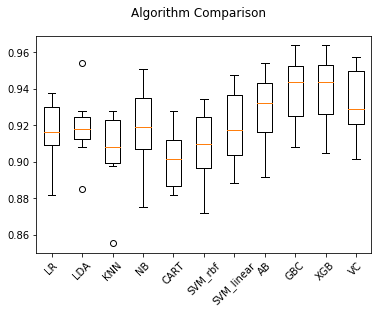

In [70]:
# A plot for comparing the different algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
pyplot.show()